# Title :

---

## Introduction

lorem ipsum

## Methodology

lorem ipsum

### Preprocessing

In [ ]:
# Import Library
import xarray as xr
import numpy as np

In [ ]:
# Open dataset
df = xr.open_dataset("cru_ts4.09.1901.2024.tmp.dat.nc/cru_ts4.09.1901.2024.tmp.dat.nc")  # lazy loading (good for big files)

# Subset UK (for more accurate, layer with UK boundaries)
df_uk = df.sel(
    lat=slice(49.5, 61.5),
    lon=slice(-11.0, 2.0)
)

print(df_uk)

    

<xarray.Dataset> Size: 19MB
Dimensions:  (time: 1488, lat: 24, lon: 26)
Coordinates:
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2024-12-16
  * lat      (lat) float32 96B 49.75 50.25 50.75 51.25 ... 60.25 60.75 61.25
  * lon      (lon) float32 104B -10.75 -10.25 -9.75 -9.25 ... 0.75 1.25 1.75
Data variables:
    tmp      (time, lat, lon) float32 4MB ...
    stn      (time, lat, lon) float64 7MB ...
    mae      (time, lat, lon) float32 4MB ...
    maea     (time, lat, lon) float32 4MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.09 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2503051245. Data generated from:tmp.2503051121.dtb
    history:      Wed  5 Mar 13:28:04 GMT 2025 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    con

#### Datasets Description

1. `tmp` : The temperature variable `tmp` represents the monthly mean surface air temperature recorded at each grid cell across UK domain. Observations are provided on a regular latitude–longitude grid and span the period from January 1901 to December 2024. 
2. `lat`/`lon` : Longitude/Latittude
3. `time` : The time dimension represents monthly observations spanning January 1901 to December 2024. Each timestamp corresponds to a monthly average temperature value.
4. `stn` : The station count variable represents the number of observational weather stations contributing to the interpolation process used to estimate temperature at each grid cell. Higher station counts indicate stronger observational support and potentially lower uncertainty, whereas lower values suggest greater reliance on spatial interpolation and therefore increased uncertainty. For example, `stn` = 12 i.e. temperature estimate derived using data from 12 nearby stations.



In [28]:
# Time Variable
df_uk.time.min(), df_uk.time.max()
df_uk.time.values[:24]

array(['1901-01-16T00:00:00.000000000', '1901-02-15T00:00:00.000000000',
       '1901-03-16T00:00:00.000000000', '1901-04-16T00:00:00.000000000',
       '1901-05-16T00:00:00.000000000', '1901-06-16T00:00:00.000000000',
       '1901-07-16T00:00:00.000000000', '1901-08-16T00:00:00.000000000',
       '1901-09-16T00:00:00.000000000', '1901-10-16T00:00:00.000000000',
       '1901-11-16T00:00:00.000000000', '1901-12-16T00:00:00.000000000',
       '1902-01-16T00:00:00.000000000', '1902-02-15T00:00:00.000000000',
       '1902-03-16T00:00:00.000000000', '1902-04-16T00:00:00.000000000',
       '1902-05-16T00:00:00.000000000', '1902-06-16T00:00:00.000000000',
       '1902-07-16T00:00:00.000000000', '1902-08-16T00:00:00.000000000',
       '1902-09-16T00:00:00.000000000', '1902-10-16T00:00:00.000000000',
       '1902-11-16T00:00:00.000000000', '1902-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')

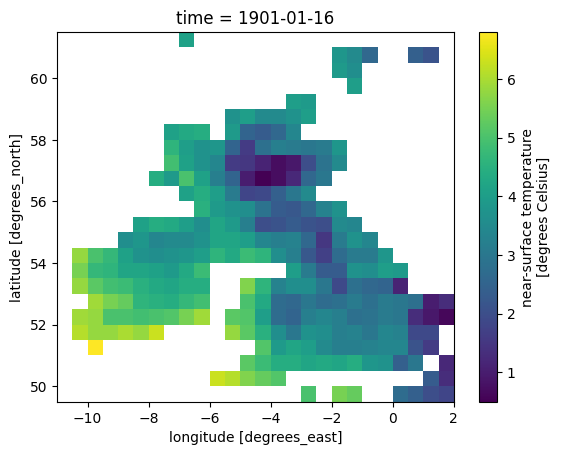

In [29]:
# Plotting time = 0
df_uk["tmp"].isel(time=0).plot()